Prophet is a user-friendly forecasting tool developed by Facebook, known for its simplicity and accuracy in predicting time series data. It automatically handles seasonality, holidays, and other patterns, making it accessible to users without extensive statistical expertise. With intuitive parameter settings and diagnostics, Prophet enables easy customization and evaluation of forecasts, while also allowing for the inclusion of external information to improve accuracy. Widely used across industries, Prophet has become a go-to solution for demand forecasting, resource planning, and financial analysis.

In [1]:
#Importing necessary libraries
from prophet import Prophet #for timeseries forecsting
from prophet.plot import add_changepoints_to_plot

import numpy as np #For numerical operations
import pandas as pd #For data manipulation and analysis
import matplotlib.pyplot as plt #For plotting the graphs
import seaborn as sns #for enhanced  visualizations in data exploration

/Users/likhitayerra/micromamba/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Here, necessary libraries are imported, including Prophet for time series forecasting, and other standard libraries for data manipulation and visualization.

In [2]:
#Setting the file path and loading the dataset
path = '/Users/likhitayerra/Documents/GitHub/timeseries_ressources/airline_passengers.csv'
df = pd.read_csv(path)

# Displaying the first few rows of the dataframe
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


The dataset is loaded from a CSV file, and the 'Month' column is set as the index with a monthly frequency. The first few rows of the dataset are displayed.

In [3]:
# Converting the 'Month' column to datetime and setting it to month end
df['Month'] = pd.to_datetime(df['Month']) + pd.tseries.offsets.MonthBegin(1)


The 'Month' column is converted to datetime and set to month-begin

In [4]:
df

,Month,Passengers
0,1949-02-01,112
1,1949-03-01,118
2,1949-04-01,132
3,1949-05-01,129
4,1949-06-01,121
...,...,...
139,1960-09-01,606
140,1960-10-01,508
141,1960-11-01,461
142,1960-12-01,390


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
# Function to check dataframe properties
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())

In [7]:
# Checking dataframe for any null values
check_df(df)

######################### Head #########################
       Month  Passengers
0 1949-02-01         112
1 1949-03-01         118
2 1949-04-01         132
3 1949-05-01         129
4 1949-06-01         121
######################### Tail #########################
         Month  Passengers
139 1960-09-01         606
140 1960-10-01         508
141 1960-11-01         461
142 1960-12-01         390
143 1961-01-01         432
######################### Shape #########################
(144, 2)
######################### Types #########################
Month         datetime64[ns]
Passengers             int64
dtype: object
######################### NA #########################
Month         0
Passengers    0
dtype: int64


The check_df function is defined to inspect the structure, types, and presence of null values in the dataframe

No nulls. That's good.

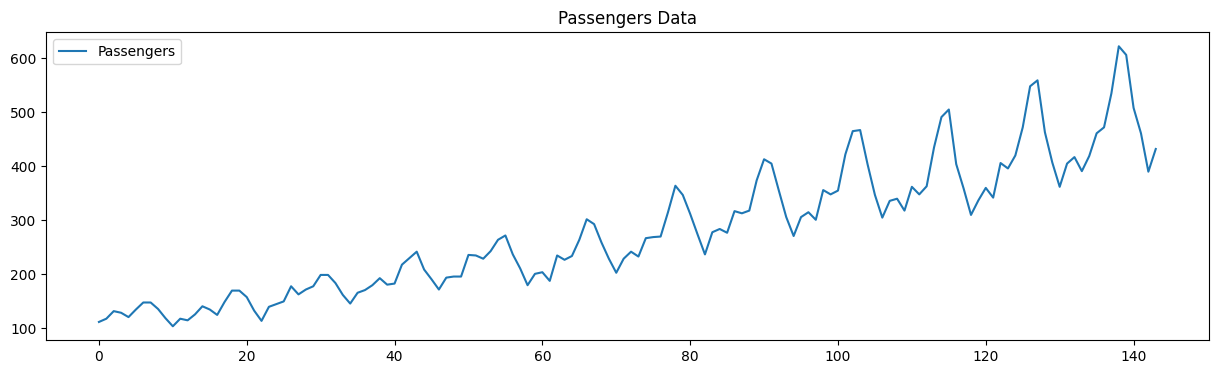

In [8]:
# Plotting the 'Passengers' data
df[['Passengers']].plot(figsize=(15,4), title='Passengers Data')
plt.show()

The 'Passengers' data is plotted to visualize the trend and patterns.

Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

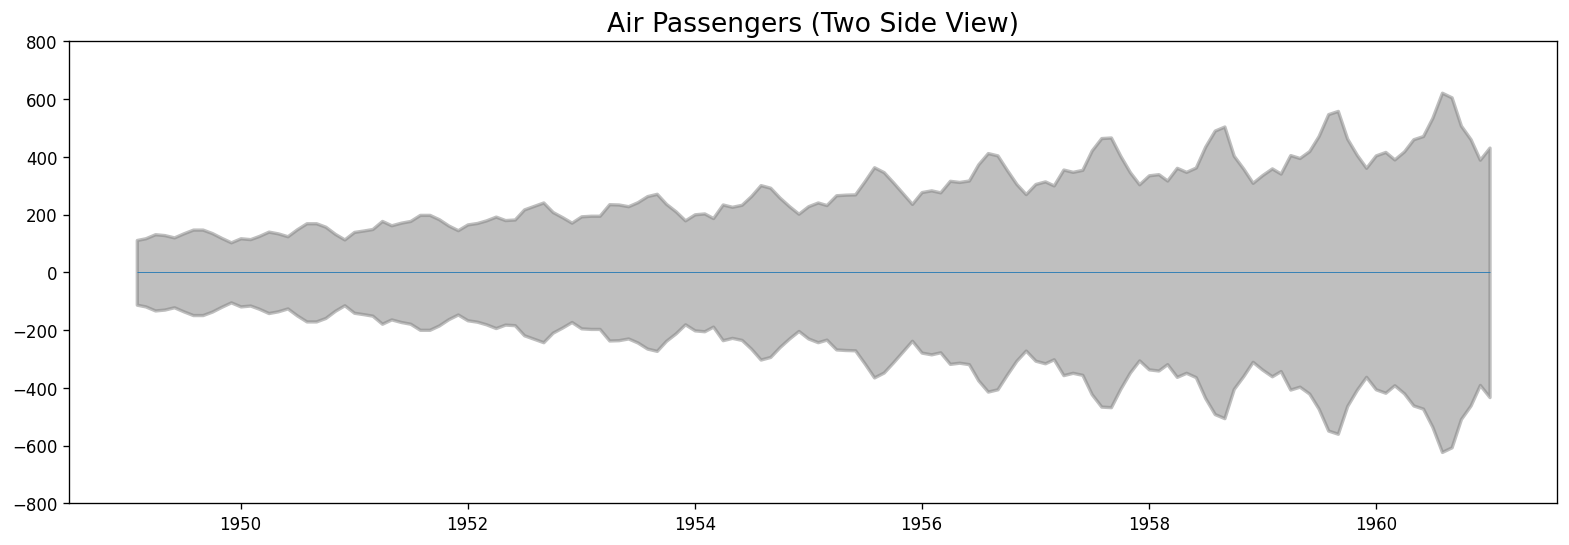

In [9]:
# Plotting the 'Passengers' data with both positive and negative y-axis
x = df['Month'].values
y1 = df['Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='grey')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Month']), xmax=np.max(df['Month']), linewidth=.5)
plt.show()

It can be seen that its a monthly time series and follows a certain repetitive pattern every year. So, we can plot each year as a separate line in the same plot. This let us compare the year wise patterns side-by-side.

We need to decide what time period we want to forecast. Let's forecast  yearly.

Let's fit a Prophet model with the training data.

In [10]:
# Fitting a Prophet model with training data
df=df.rename(columns={'Month':'ds', 'Passengers':'y'})

The dataframe is renamed to match the expected column names by Prophet. A training and testing split is created for model evaluation.

In [11]:
# Using Holdut Method ===> Train: 120 Month and Test: 24 Month
split_index = 120
train = df[:split_index]
test = df[split_index:]
print((len(train), len(test)))

(120, 24)


Let's instantiate a Prophet object and fit it to the training data with default parameters

In [12]:
# Function to create and visualize a Prophet model
def create_prophet_model(train, test):
  # Instantiate Prophet model
  model = Prophet(interval_width=0.95)
  # Fit the model to the training data
  model.fit(train)
  # Make predictions on the test data
  forecast = model.predict(test)
  
  # Plotting components of the forecast
  model.plot_components(forecast)
  plt.show()

  # Plotting actual vs predicted values
  forecast.index = forecast.index + split_index + 1
  plt.figure(figsize=(12,6))
  plt.plot(df['y'], label='Actual')
  plt.plot(forecast['yhat'], label='Predicted')
  plt.legend()
  plt.title("Comparison of Actual Results with Predicted Results")
  # Adding changepoints to the plot
  model= Prophet(changepoint_range=0.9)
  forecast = model.fit(df).predict(test)
  fig = model.plot(forecast)
  a = add_changepoints_to_plot(fig.gca(), model, forecast)
  
  
  
  plt.show()

  return forecast
  
     

A function is defined to create, fit, and visualize a Prophet model. It includes plotting the components of the forecast, actual vs. predicted values, and changepoints

11:33:20 - cmdstanpy - INFO - Chain [1] start processing
11:33:20 - cmdstanpy - INFO - Chain [1] done processing
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydat

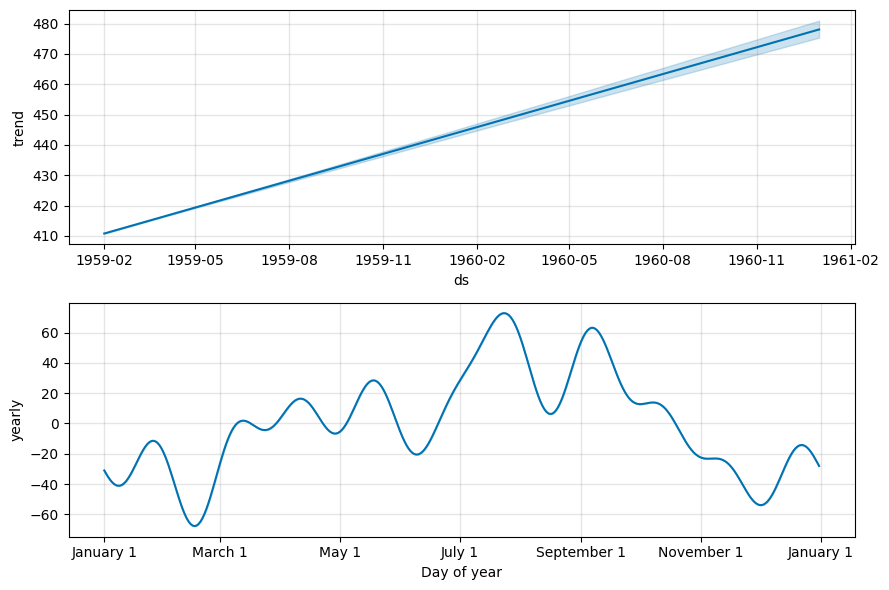

11:33:21 - cmdstanpy - INFO - Chain [1] start processing
11:33:21 - cmdstanpy - INFO - Chain [1] done processing
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


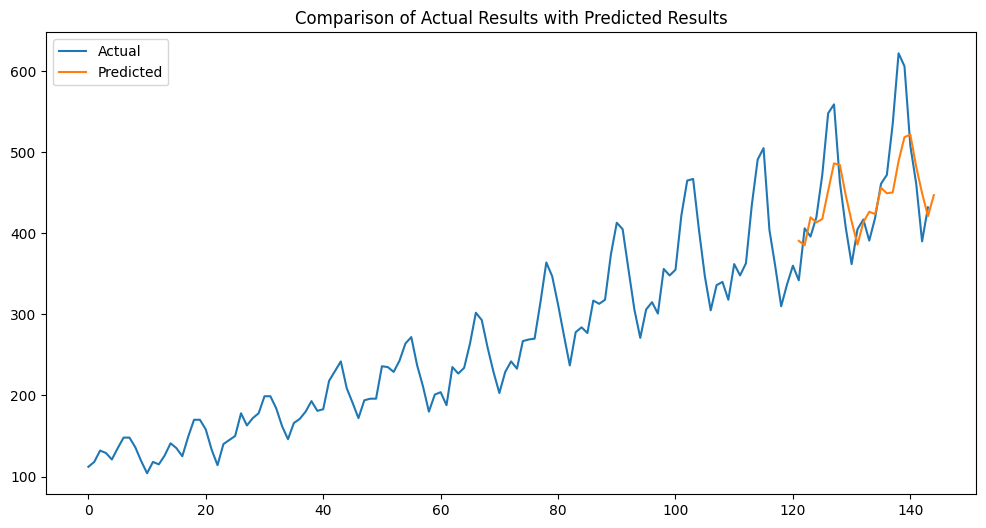

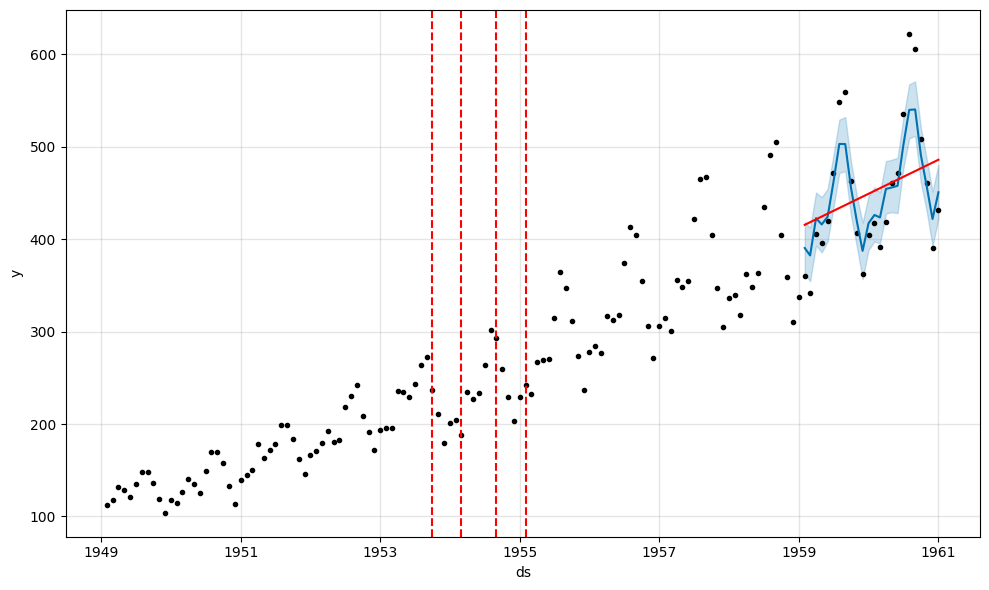

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1959-02-01,415.516142,362.777035,418.437434,415.516142,415.516142,-25.083745,-25.083745,-25.083745,-25.083745,-25.083745,-25.083745,0.0,0.0,0.0,390.432397
1,1959-03-01,418.331216,354.429446,412.348262,418.331216,418.331216,-35.949112,-35.949112,-35.949112,-35.949112,-35.949112,-35.949112,0.0,0.0,0.0,382.382104
2,1959-04-01,421.447905,392.967299,450.486942,421.447905,421.447905,1.243755,1.243755,1.243755,1.243755,1.243755,1.243755,0.0,0.0,0.0,422.691660
3,1959-05-01,424.464055,385.683430,445.439425,424.464055,424.464055,-8.584613,-8.584613,-8.584613,-8.584613,-8.584613,-8.584613,0.0,0.0,0.0,415.879442
4,1959-06-01,427.581495,397.735630,454.567981,427.581495,427.581495,-3.186880,-3.186880,-3.186880,-3.186880,-3.186880,-3.186880,0.0,0.0,0.0,424.394615
5,1959-07-01,430.598373,433.768159,490.474855,430.598373,430.598373,30.778064,30.778064,30.778064,30.778064,30.778064,30.778064,0.0,0.0,0.0,461.376437
6,1959-08-01,433.715813,471.631827,529.297022,433.715813,433.715813,69.294889,69.294889,69.294889,69.294889,69.294889,69.294889,0.0,0.0,0.0,503.010702
7,1959-09-01,436.833253,473.666495,532.075073,436.833253,436.833253,66.044828,66.044828,66.044828,66.044828,66.044828,66.044828,0.0,0.0,0.0,502.878081
8,1959-10-01,439.850131,425.626842,484.253463,439.850131,439.850131,15.962112,15.962112,15.962112,15.962112,15.962112,15.962112,0.0,0.0,0.0,455.812243
9,1959-11-01,442.967571,391.487242,446.453669,442.967571,442.967571,-23.848295,-23.848295,-23.848295,-23.848295,-23.848295,-23.848295,0.0,0.0,0.0,419.119276


In [13]:
# Calling the function to create and visualize Prophet model
create_prophet_model(train, test)

Again, the dots are the actual data points. The line through the dots is the predicted values. The shared area represents the uncertainty intervals.

Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.


Changepoints are the datetime points where the time series have abrupt changes in the trajectory.

By default, Prophet adds 25 changepoints to the initial 80% of the data-set.

Let’s plot the vertical lines where the potential changepoints occurred.

The first plot shows that the monthly volume of airline passengers has been linearly increasing over time.

The second plot highlights the fact that the weekly count of passengers peaks towards the end of the week and on Saturday.


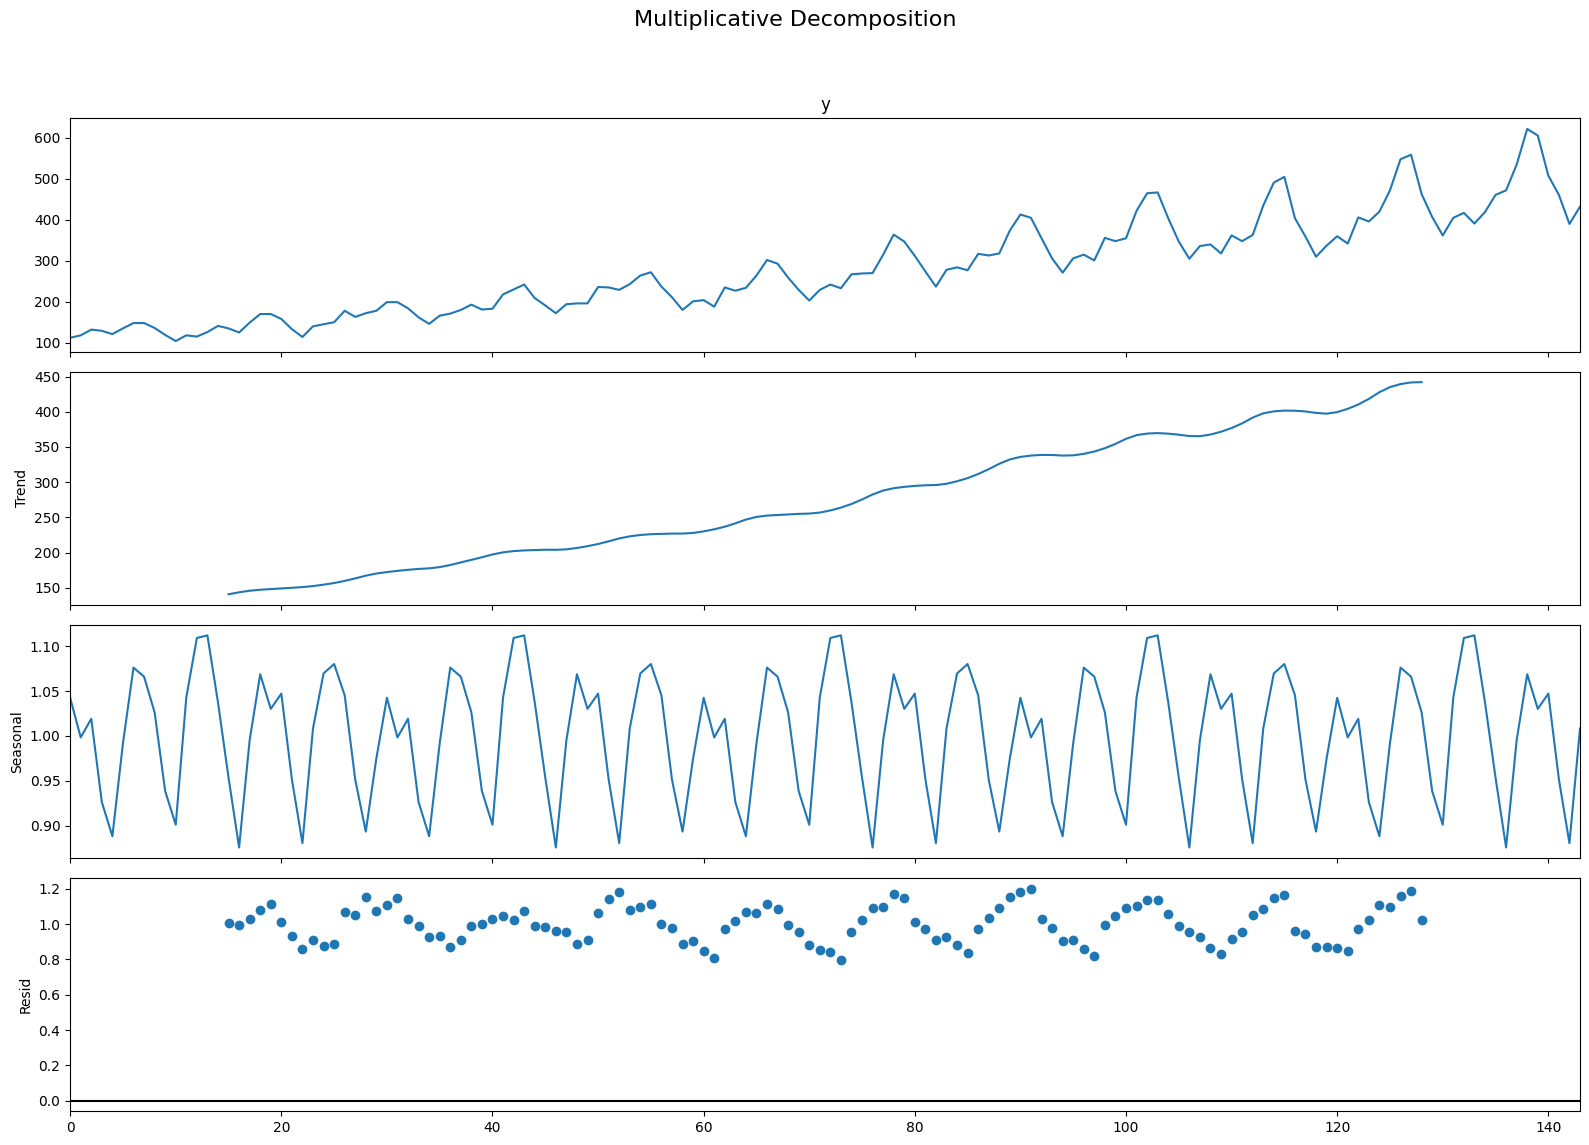

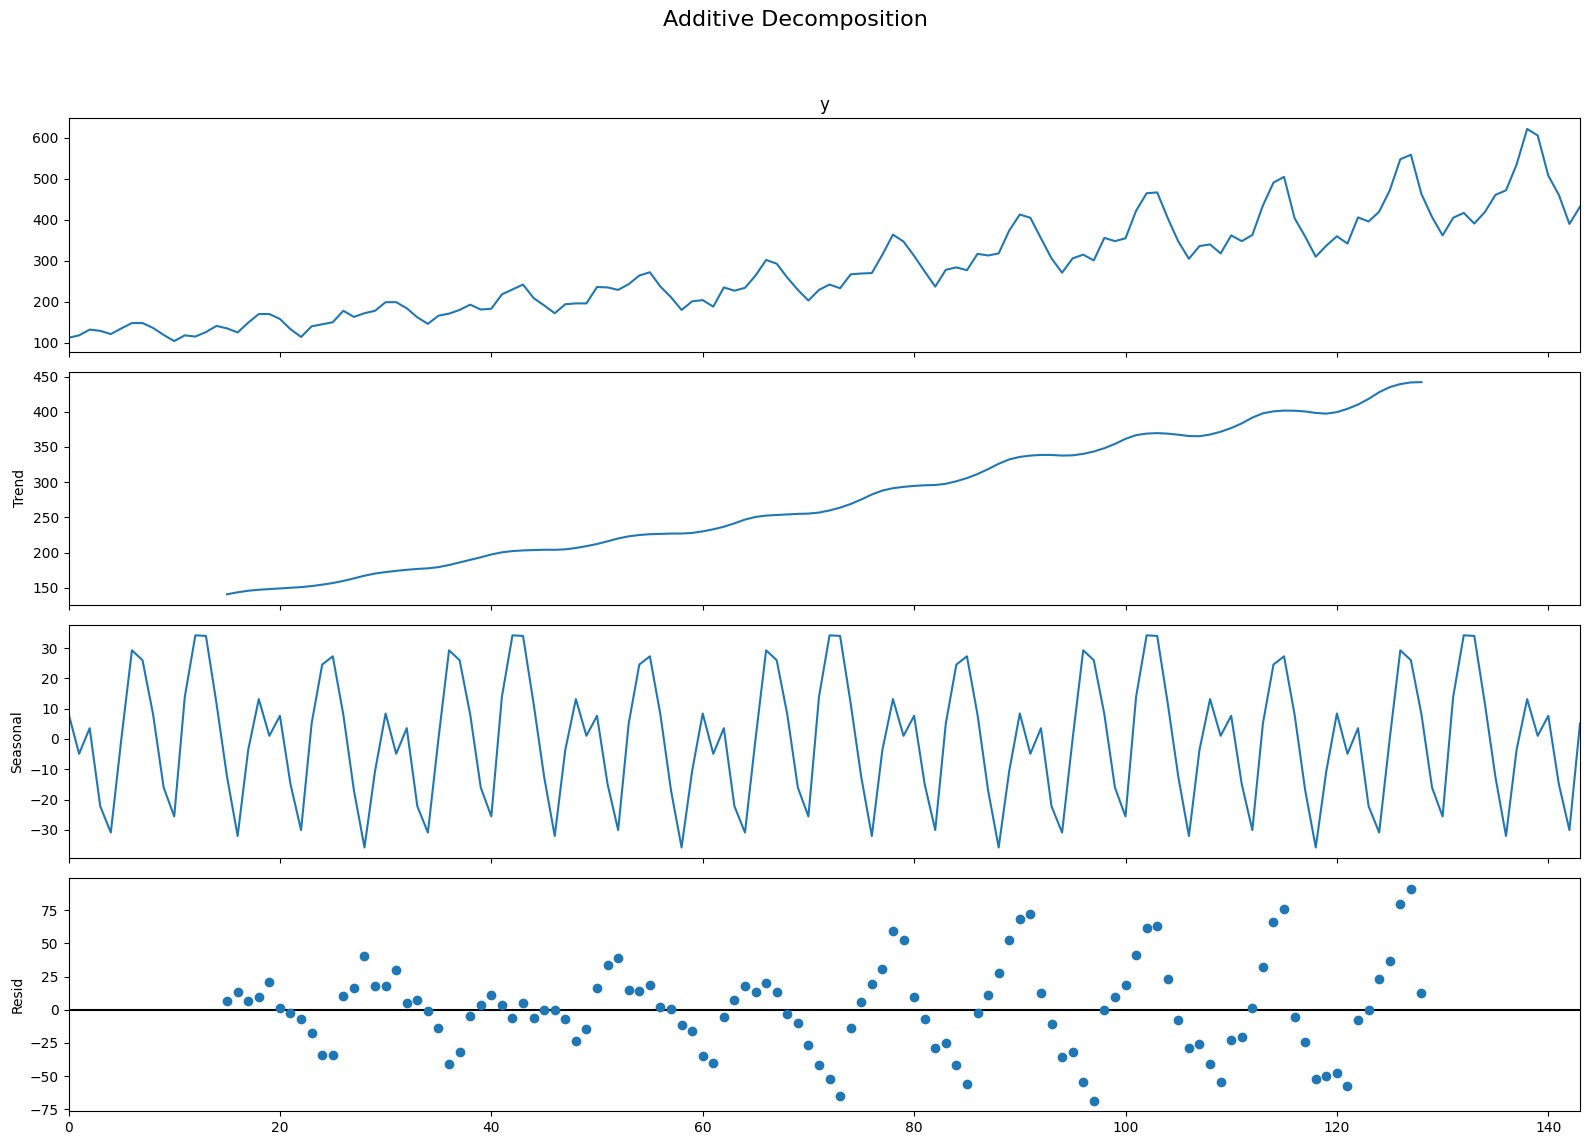

In [14]:
# Performing seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['y'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['y'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

If we look at the residuals of the additive decomposition closely, it has some pattern left over.

The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

11:33:23 - cmdstanpy - INFO - Chain [1] start processing


11:33:23 - cmdstanpy - INFO - Chain [1] done processing
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


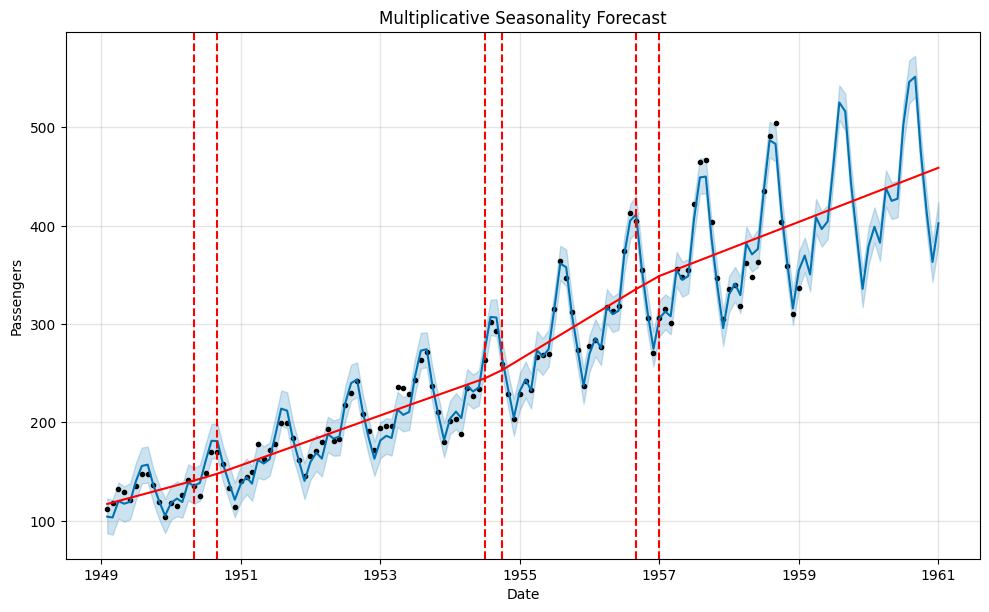

/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of 

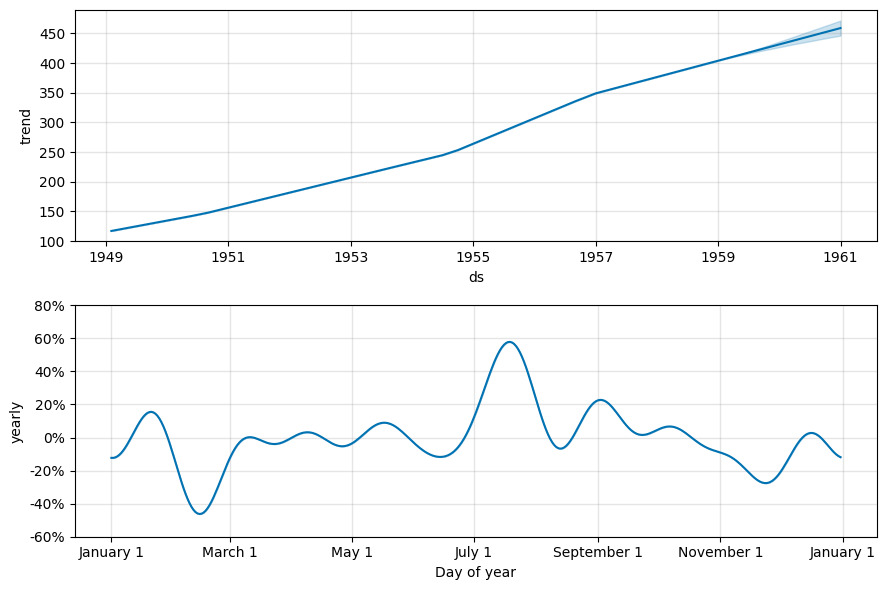

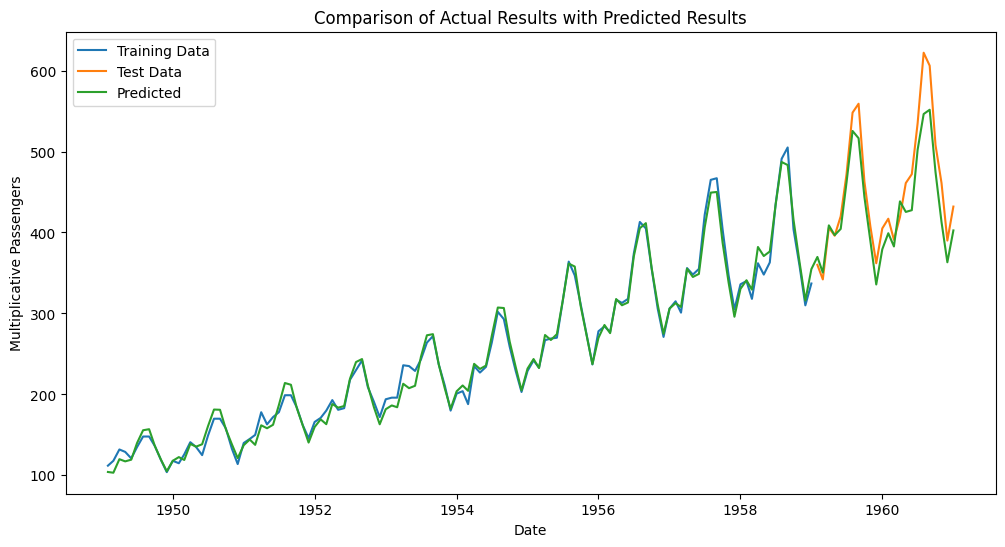

/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


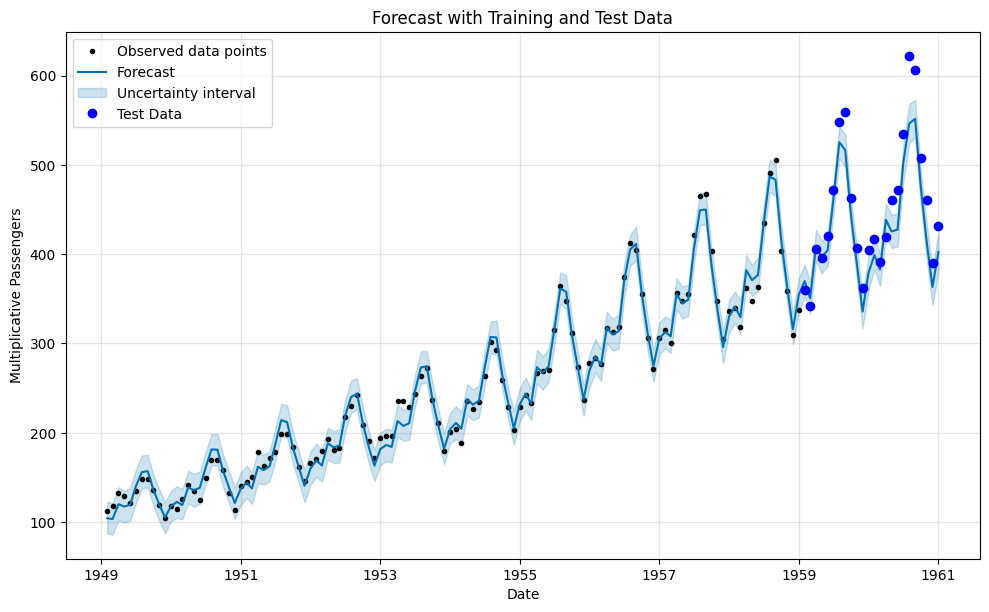

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
121,1949-02-01,117.057990,87.273995,122.609031,117.057990,117.057990,-0.109804,-0.109804,-0.109804,-0.109804,-0.109804,-0.109804,0.0,0.0,0.0,104.204607
122,1949-03-01,118.523087,85.731422,121.399058,118.523087,118.523087,-0.128528,-0.128528,-0.128528,-0.128528,-0.128528,-0.128528,0.0,0.0,0.0,103.289545
123,1949-04-01,120.145158,102.178162,138.948489,120.145158,120.145158,-0.001382,-0.001382,-0.001382,-0.001382,-0.001382,-0.001382,0.0,0.0,0.0,119.979139
124,1949-05-01,121.714905,99.062774,134.829431,121.714905,121.714905,-0.036182,-0.036182,-0.036182,-0.036182,-0.036182,-0.036182,0.0,0.0,0.0,117.311019
125,1949-06-01,123.336977,101.431979,138.192142,123.336977,123.336977,-0.031926,-0.031926,-0.031926,-0.031926,-0.031926,-0.031926,0.0,0.0,0.0,119.399364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,1960-09-01,449.819892,531.138489,572.760481,440.148668,459.752337,0.226207,0.226207,0.226207,0.226207,0.226207,0.226207,0.0,0.0,0.0,551.572292
261,1960-10-01,452.079333,454.047109,493.538780,441.643186,462.739559,0.049978,0.049978,0.049978,0.049978,0.049978,0.049978,0.0,0.0,0.0,474.673137
262,1960-11-01,454.414089,393.430671,432.988494,443.293049,465.651821,-0.091653,-0.091653,-0.091653,-0.091653,-0.091653,-0.091653,0.0,0.0,0.0,412.765555
263,1960-12-01,456.673529,342.991473,383.696759,444.740423,468.672598,-0.204649,-0.204649,-0.204649,-0.204649,-0.204649,-0.204649,0.0,0.0,0.0,363.215730


In [15]:
def create_prophet_model_m2(train, test):
    # Initialize Prophet model with multiplicative seasonality
    m2 = Prophet(seasonality_mode='multiplicative',interval_width=0.95)
    
    # Fit the model to the training data
    m2.fit(train)
    
    # Create a future dataframe for forecasting
    future = m2.make_future_dataframe(periods=len(test), freq='MS')
    
    # Make predictions on the future dataframe
    forecast = m2.predict(future)
    
    # Plot the forecast
    fig = m2.plot(forecast)
    a = add_changepoints_to_plot(fig.gca(), m2, forecast)
    plt.title('Multiplicative Seasonality Forecast')
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    plt.show()
    
    
    # Plot the forecast components
    m2.plot_components(forecast)
    plt.show()
    
    # Adjust the index of the forecast to match the original dataframe
    forecast.index = forecast.index + len(train) + 1
    
    # Plot the actual vs. predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(train['ds'], train['y'], label='Training Data')
    plt.plot(test['ds'], test['y'], label='Test Data')
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
    plt.legend()
    plt.title("Comparison of Actual Results with Predicted Results")
    plt.xlabel('Date')
    plt.ylabel('Multiplicative Passengers')
    plt.show()
    
    # Plot the forecast including the training and test data
    fig = m2.plot(forecast)
    plt.title('Forecast with Training and Test Data')
    plt.xlabel('Date')
    plt.ylabel('Multiplicative Passengers')
    plt.plot(test['ds'], test['y'], 'bo', label='Test Data')
    plt.legend()
    plt.show()
        
    return forecast

# Calling the function to create and visualize Prophet model with multiplicative seasonality
create_prophet_model_m2(train, test)


Prophet allows us to adjust the trend in case there is an overfit or underfit.

changepoint_prior_scale helps adjust the strength of the trend.

Default value for changepoint_prior_scale is 0.05.

Decrease the value to make the trend less flexible.

Increase the value of changepoint_prior_scale to make the trend more flexible.

Increasing the changepoint_prior_scale to 0.08 to make the trend flexible

In [16]:
logdf = df.copy()
logdf['y'] = np.log(logdf['y'])

11:33:25 - cmdstanpy - INFO - Chain [1] start processing


11:33:25 - cmdstanpy - INFO - Chain [1] done processing
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


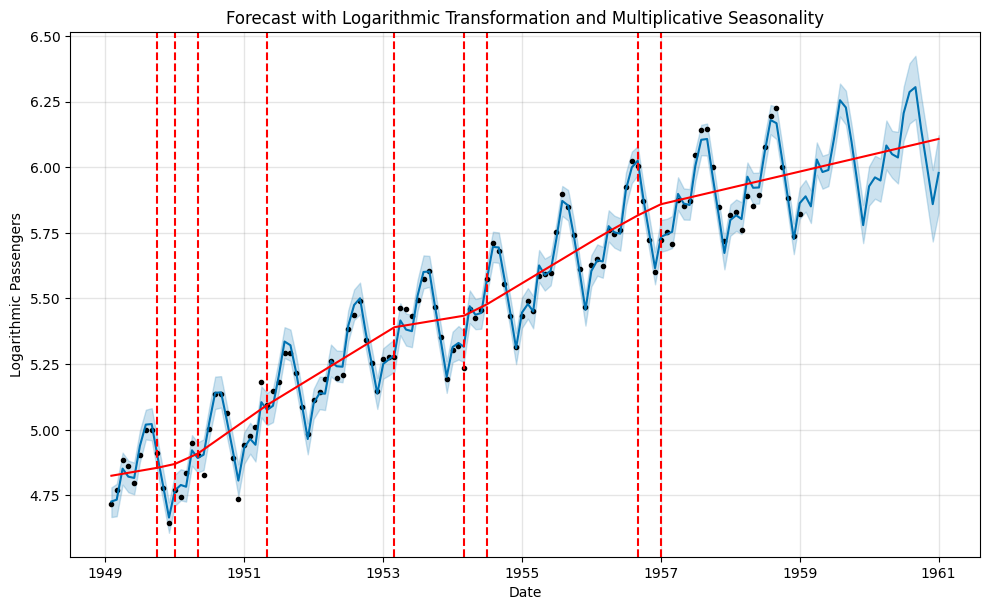

/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of 

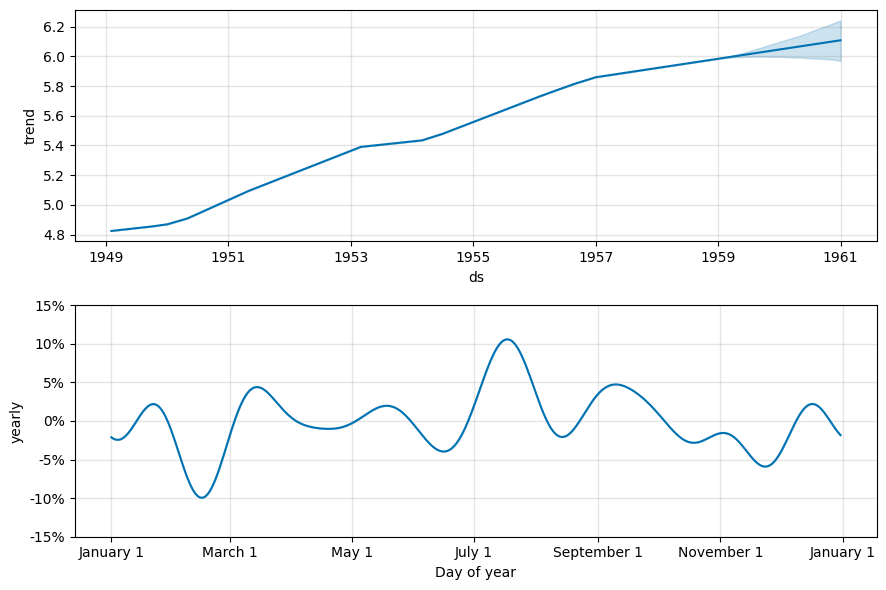

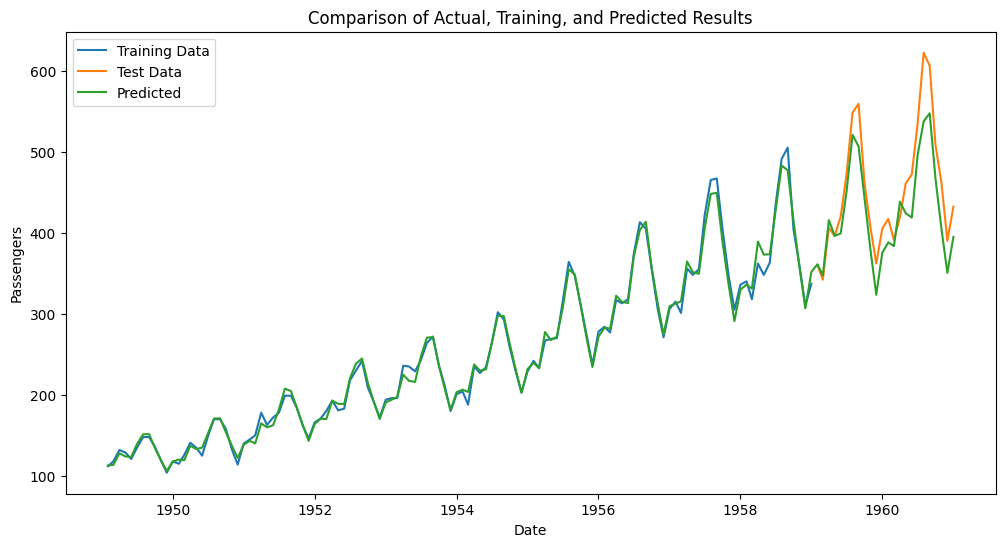

/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


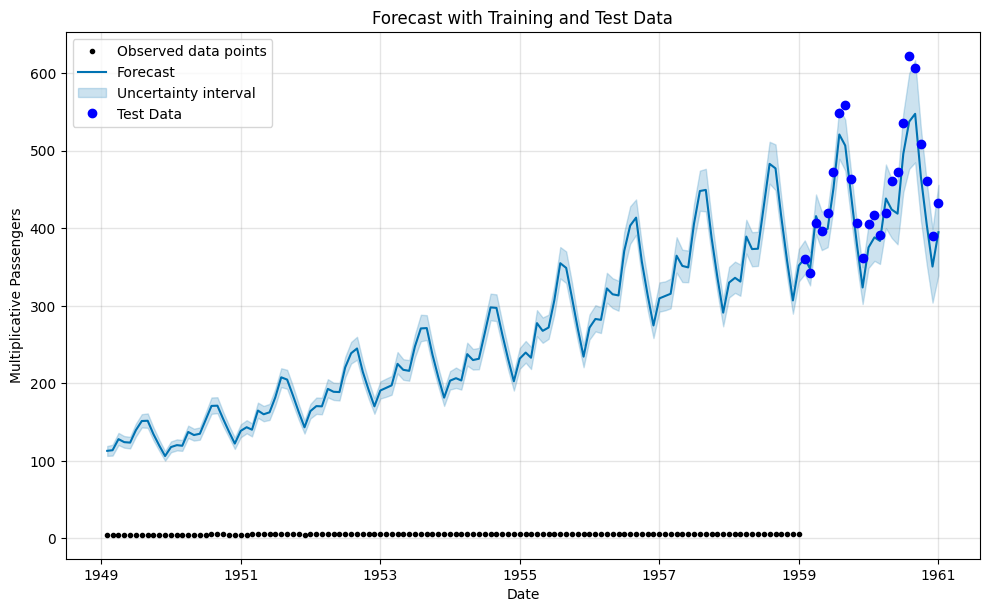

In [17]:


def create_prophet_model_m3(train, test):
    # Copy dataframe and apply logarithmic transformation to the target variable
    log_train = train.copy()
    log_train['y'] = np.log(log_train['y'])
    
    # Initialize Prophet model with multiplicative seasonality
    m3 = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
    
    # Fit the model to the log-transformed training data
    m3.fit(log_train)
    
    # Create future dataframe for forecasting
    future = m3.make_future_dataframe(periods=len(test), freq='MS')
    
    # Make predictions
    forecast = m3.predict(future)
    
    # Plot the forecast
    fig = m3.plot(forecast)
    # Add changepoints to the plot
    a = add_changepoints_to_plot(fig.gca(), m3, forecast)
    plt.title('Forecast with Logarithmic Transformation and Multiplicative Seasonality')
    plt.xlabel('Date')
    plt.ylabel('Logarithmic Passengers')
    plt.show()
    
    # Plot the forecast components
    m3.plot_components(forecast)
    plt.show()
    
    # Back-transform the forecasted values to the original scale
    forecast['yhat'] = np.exp(forecast['yhat'])
    forecast['yhat_lower'] = np.exp(forecast['yhat_lower'])
    forecast['yhat_upper'] = np.exp(forecast['yhat_upper'])
    
    # Plotting actual, predicted, training, and test values
    plt.figure(figsize=(12, 6))
    plt.plot(train['ds'], train['y'], label='Training Data')
    plt.plot(test['ds'], test['y'], label='Test Data')
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
    plt.legend()
    plt.title("Comparison of Actual, Training, and Predicted Results")
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    plt.show()
    
    # Plot the forecast including the training and test data
    fig = m3.plot(forecast)
    plt.title('Forecast with Training and Test Data')
    plt.xlabel('Date')
    plt.ylabel('Multiplicative Passengers')
    plt.plot(test['ds'], test['y'], 'bo', label='Test Data')
    plt.legend()
    plt.show()
    return forecast

# Assuming train and test dataframes are defined
forecast = create_prophet_model_m3(train, test)


from here we are depending completely on prophet

11:33:26 - cmdstanpy - INFO - Chain [1] start processing
11:33:26 - cmdstanpy - INFO - Chain [1] done processing
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


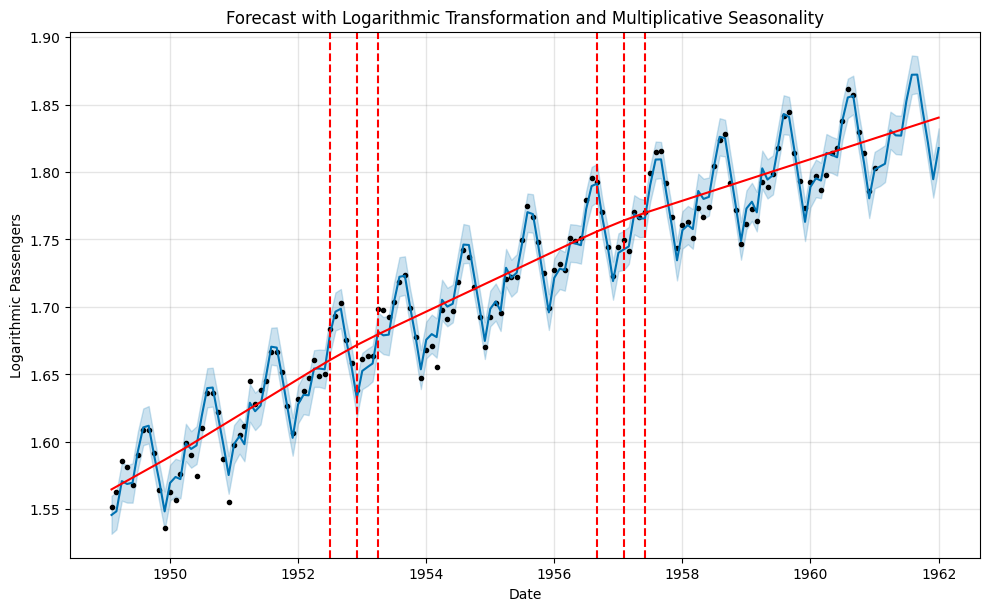

/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/likhitayerra/micromamba/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of 

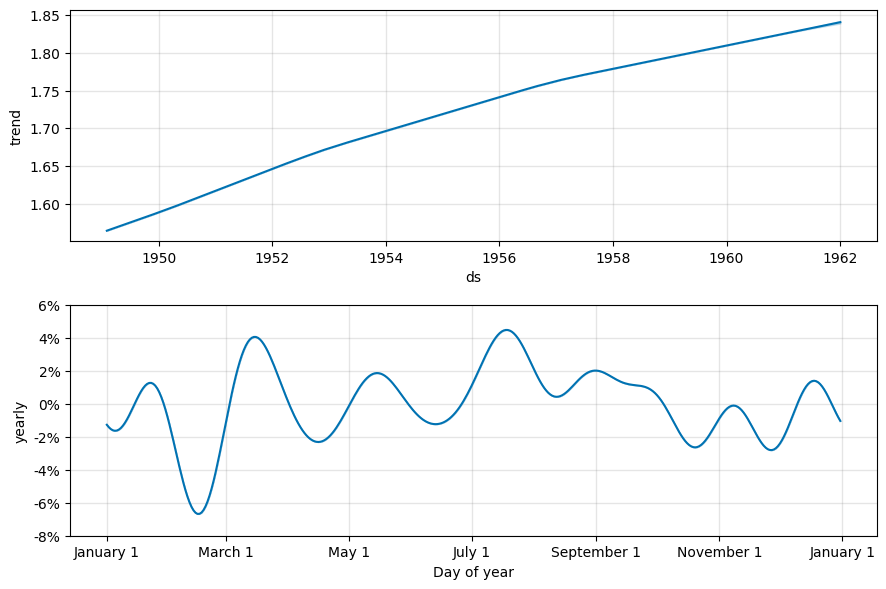

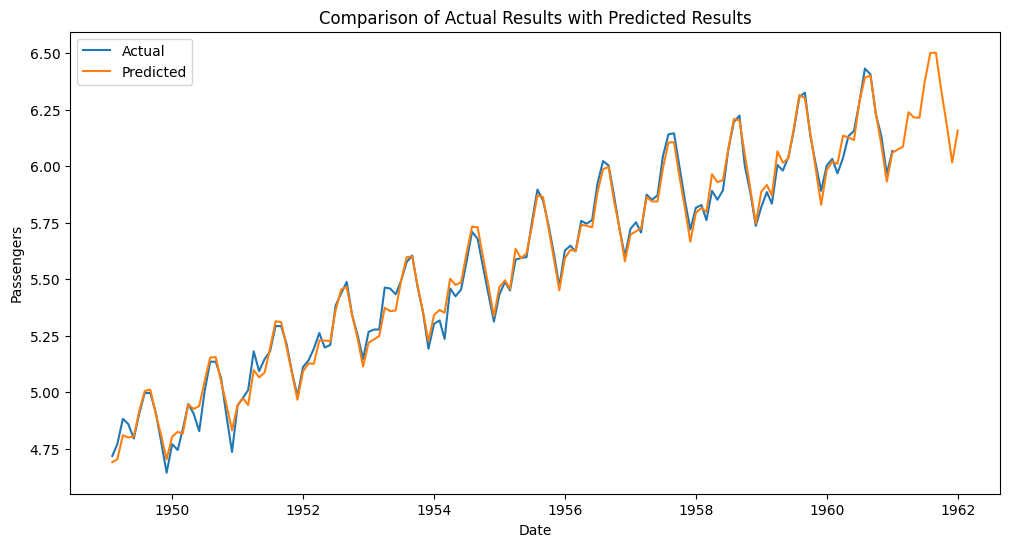

In [18]:

def create_prophet_model_m3(df):
    # Copy dataframe and apply logarithmic transformation to the target variable
    logdf = df.copy()
    logdf['y'] = np.log(logdf['y'])

    # Initialize Prophet model with multiplicative seasonality
    m3 = Prophet(seasonality_mode='multiplicative',yearly_seasonality=True,interval_width=0.95,changepoint_prior_scale=0.01)
    
    # Fit the model to the log-transformed data
    m3.fit(logdf)
    
    # Create future dataframe for forecasting
    future = m3.make_future_dataframe(periods=12, freq='MS')
    
    # Make predictions
    forecast = m3.predict(future)
    
    # Plot the forecast
    fig = m3.plot(forecast)
    # Add changepoints to the plot
    a = add_changepoints_to_plot(fig.gca(), m3, forecast)
    plt.title('Forecast with Logarithmic Transformation and Multiplicative Seasonality')
    plt.xlabel('Date')
    plt.ylabel('Logarithmic Passengers')
    plt.show()
        
    
    # Plot the forecast components
    m3.plot_components(forecast)
    plt.show()
    
    # Back-transform the forecasted values to the original scale
    forecast['yhat'] = np.exp(forecast['yhat'])
    forecast['yhat_lower'] = np.exp(forecast['yhat_lower'])
    forecast['yhat_upper'] = np.exp(forecast['yhat_upper'])
    
    # Plotting actual vs predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(df['ds'], df['y'], label='Actual')
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
    plt.legend()
    plt.title("Comparison of Actual Results with Predicted Results")
    plt.xlabel('Date')
    plt.ylabel('Passengers')
    plt.show()
    
    return forecast

# Calling the function with the provided dataframe
forecast = create_prophet_model_m3(logdf)
